In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Cars.csv')
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [3]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [4]:
#Data visualization

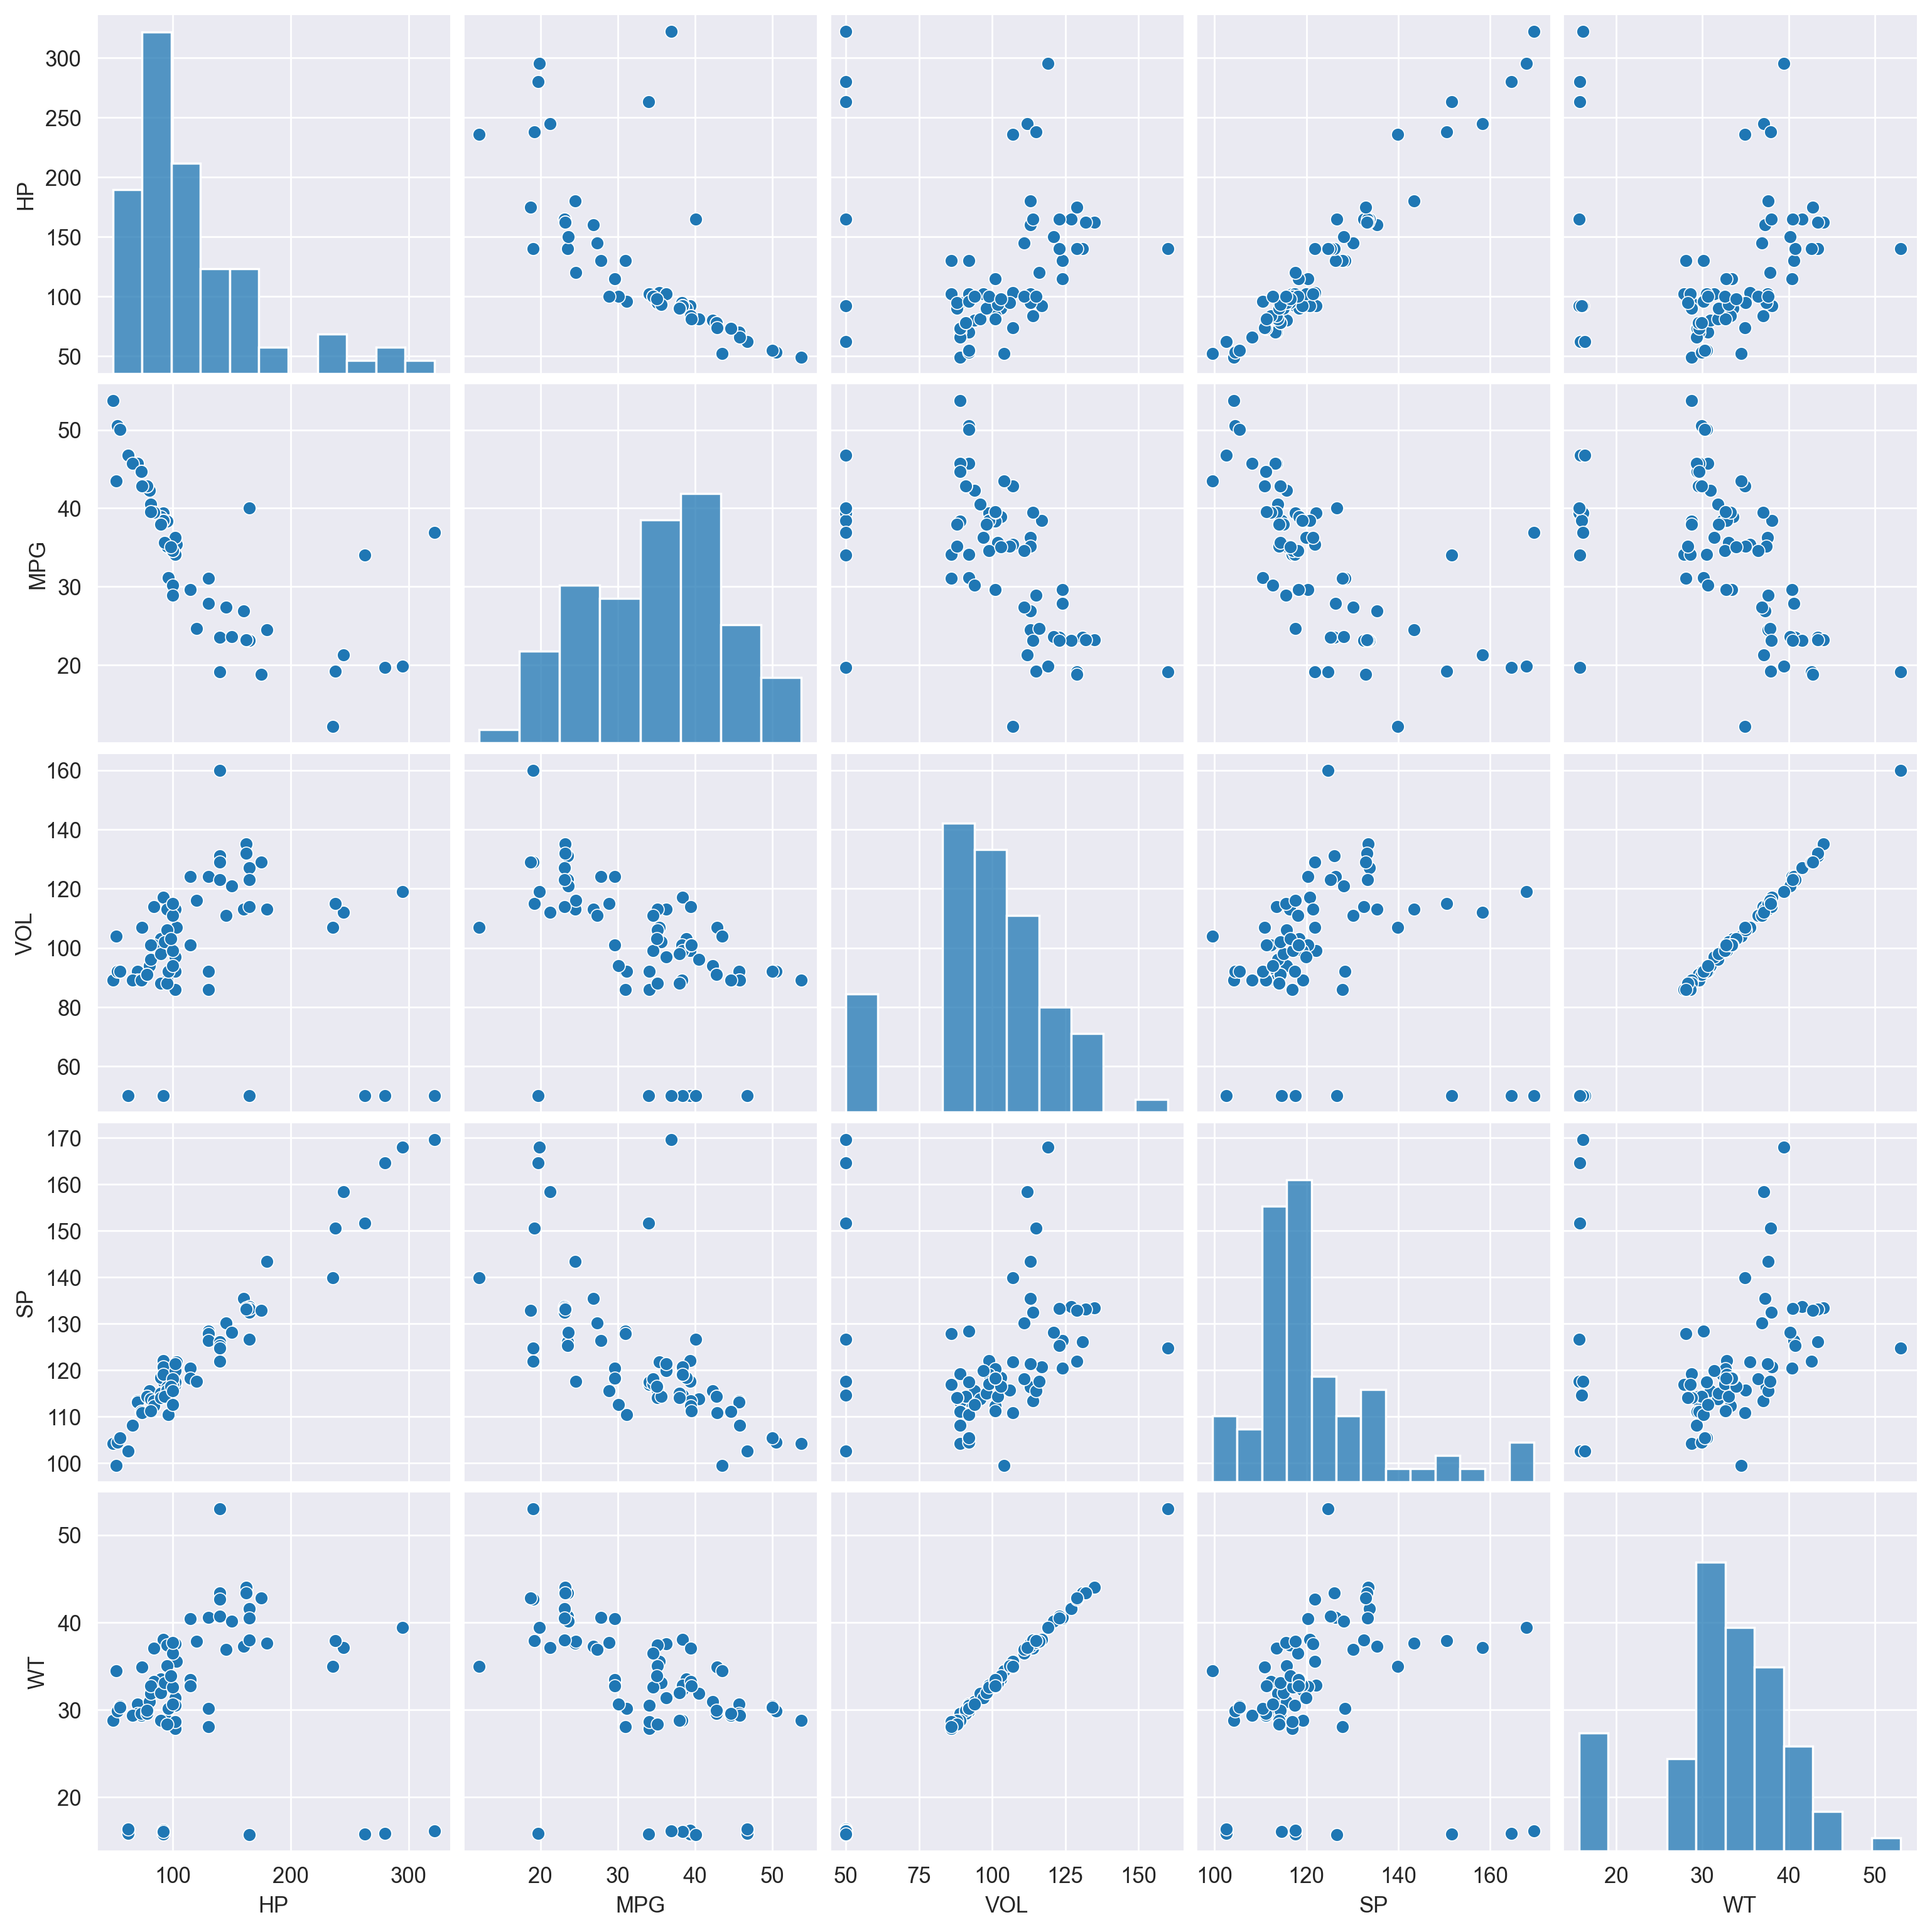

In [5]:
sns.pairplot(df)

In [6]:
#Correlation

<AxesSubplot:>

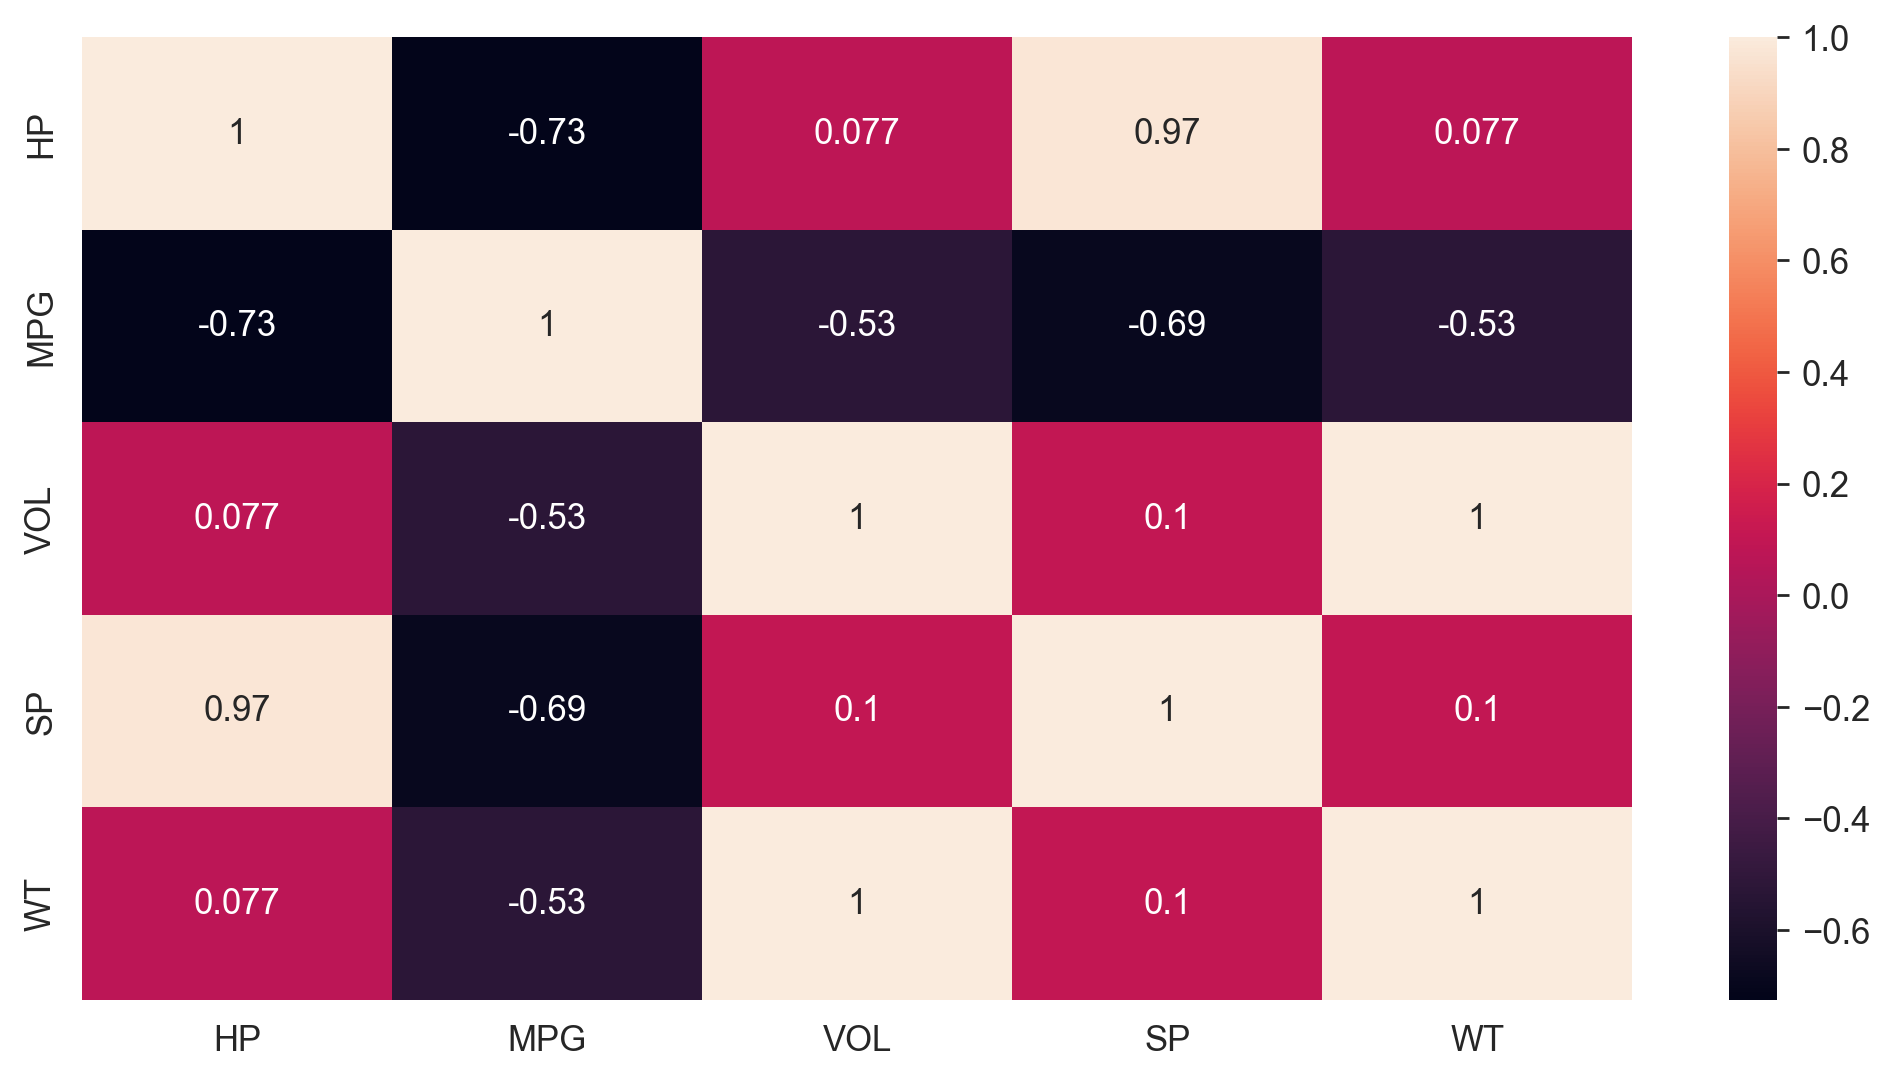

In [7]:
sns.heatmap(df.corr(),annot=True)

# Model Building

In [8]:
import statsmodels.formula.api as smf

In [9]:
model = smf.ols('MPG~HP+VOL+SP+WT',data=df).fit()

In [10]:
model.pvalues

Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64

# Simple Linear Regression

In [11]:
#Wt
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.pvalues

Intercept    5.053995e-02
WT           1.914892e-13
HP           7.560276e-07
SP           1.089096e-02
dtype: float64

In [12]:
#vol
vol = smf.ols('MPG~VOL+SP+HP',data = df).fit()
vol.pvalues

Intercept    4.194554e-02
VOL          1.648229e-13
SP           1.207855e-02
HP           8.644870e-07
dtype: float64

# Calculate VIF

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [15]:
data = df.drop(columns=['MPG'])
data

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [16]:
data.values

array([[ 49.        ,  89.        , 104.1853528 ,  28.7620589 ],
       [ 55.        ,  92.        , 105.4612635 ,  30.46683298],
       [ 55.        ,  92.        , 105.4612635 ,  30.19359657],
       [ 70.        ,  92.        , 113.4612635 ,  30.63211391],
       [ 53.        ,  92.        , 104.4612635 ,  29.88914864],
       [ 70.        ,  89.        , 113.1853528 ,  29.59176832],
       [ 55.        ,  92.        , 105.4612635 ,  30.30847957],
       [ 62.        ,  50.        , 102.5985128 ,  15.84775807],
       [ 62.        ,  50.        , 102.5985128 ,  16.35948352],
       [ 80.        ,  94.        , 115.6452041 ,  30.92015417],
       [ 73.        ,  89.        , 111.1853528 ,  29.36334142],
       [ 92.        ,  50.        , 117.5985128 ,  15.75353468],
       [ 92.        ,  99.        , 122.1050553 ,  32.81359241],
       [ 73.        ,  89.        , 111.1853528 ,  29.3784363 ],
       [ 66.        ,  89.        , 108.1853528 ,  29.34727902],
       [ 73.        ,  89

In [17]:
vif = pd.DataFrame()
vif

""


In [18]:
vif['Features'] = data.columns
vif

,Features
0,HP
1,VOL
2,SP
3,WT


In [19]:
range(len(data.columns))

range(0, 4)

In [20]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

In [21]:
vif

,Features,VIF
0,HP,11.191296
1,VOL,12708.789369
2,SP,50.541968
3,WT,12172.827328


# Subset Selection

AIC

In [22]:
#wt
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.rsquared, wt.aic

(0.769482813998346, 476.29927501529767)

In [23]:
#vol
vol = smf.ols('MPG~VOL+SP+HP',data = df).fit()
vol.rsquared, vol.aic

(0.770368341321302, 475.9875158854609)

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           1.54e-23
Time:                        13:44:34   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# MODEL VALIDATION TECHNIQUES

# 1.Residual Analysis


**As per the subset selection, it is clear that VOL column is more important than WT column as it's R2 value is more and AIC value is less,So we will select VOL columns and will drop WT column.**

**NORMALITY TEST**

In [38]:
model = smf.ols('MPG~HP+VOL+SP', data=df).fit()
model.rsquared

0.770368341321302

In [39]:
#Statsmodel
import statsmodels.api as sm

In [44]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [40]:
model.resid

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

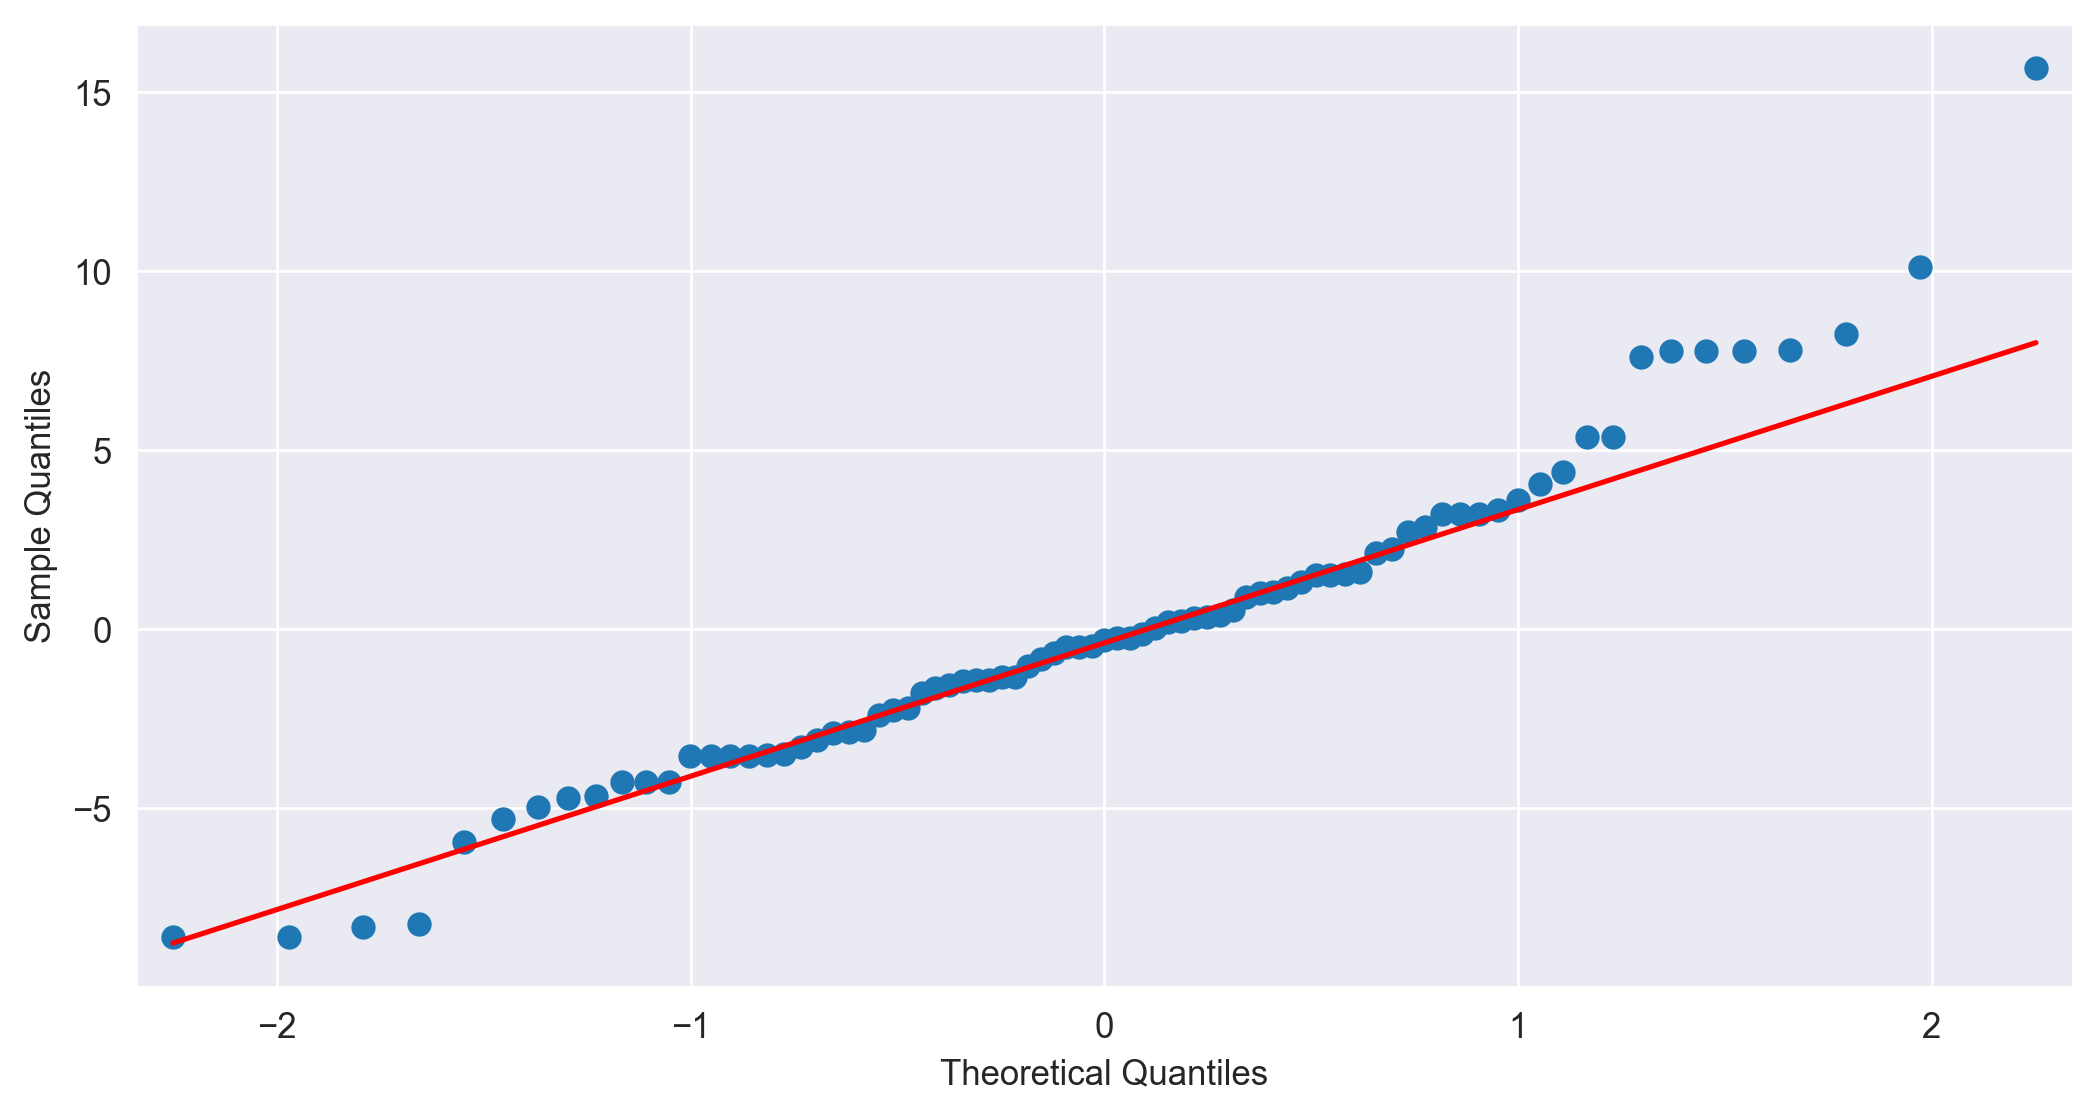

In [43]:
#Q-Q plot
sm.qqplot(model.resid, line = 'q');

In [27]:
#get index for higher residuals

In [46]:
np.argmax(model.resid), np.max(model.resid)

(76, 15.66685740285206)

# 2. Residual plot of Homoscedasticity

- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

In [48]:
model.fittedvalues, model.resid

(0     43.590769
 1     42.256794
 2     42.256794
 3     42.361497
 4     42.269544
         ...    
 76    21.233143
 77    17.867725
 78    26.216856
 79    12.237554
 80    15.592958
 Length: 81, dtype: float64,
 0     10.109912
 1      7.756607
 2      7.756607
 3      3.334825
 4      8.234688
         ...    
 76    15.666857
 77     1.330162
 78     7.783144
 79     7.596179
 80    -3.491695
 Length: 81, dtype: float64)

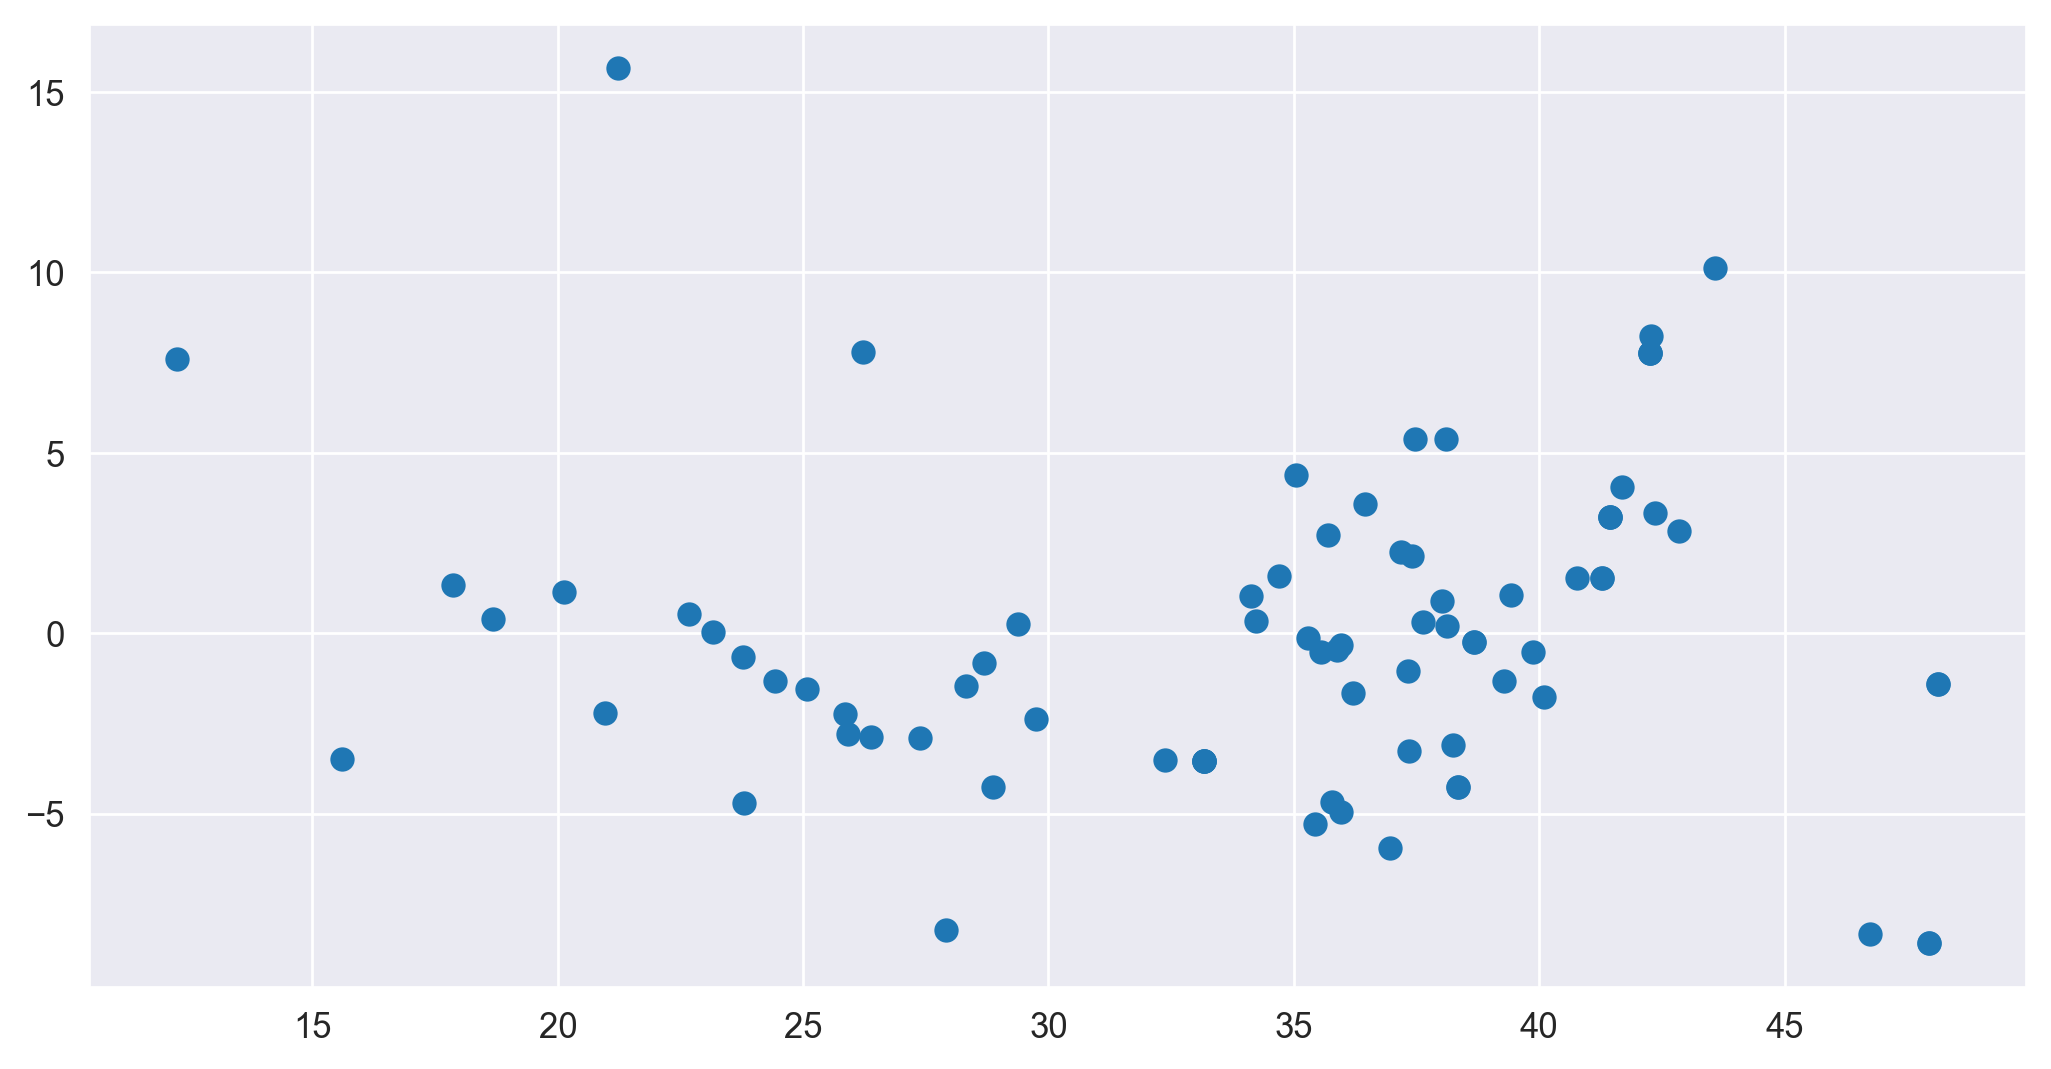

In [49]:
plt.scatter(model.fittedvalues, model.resid)

# 3.Residual VS Regressor

eval_env: 1


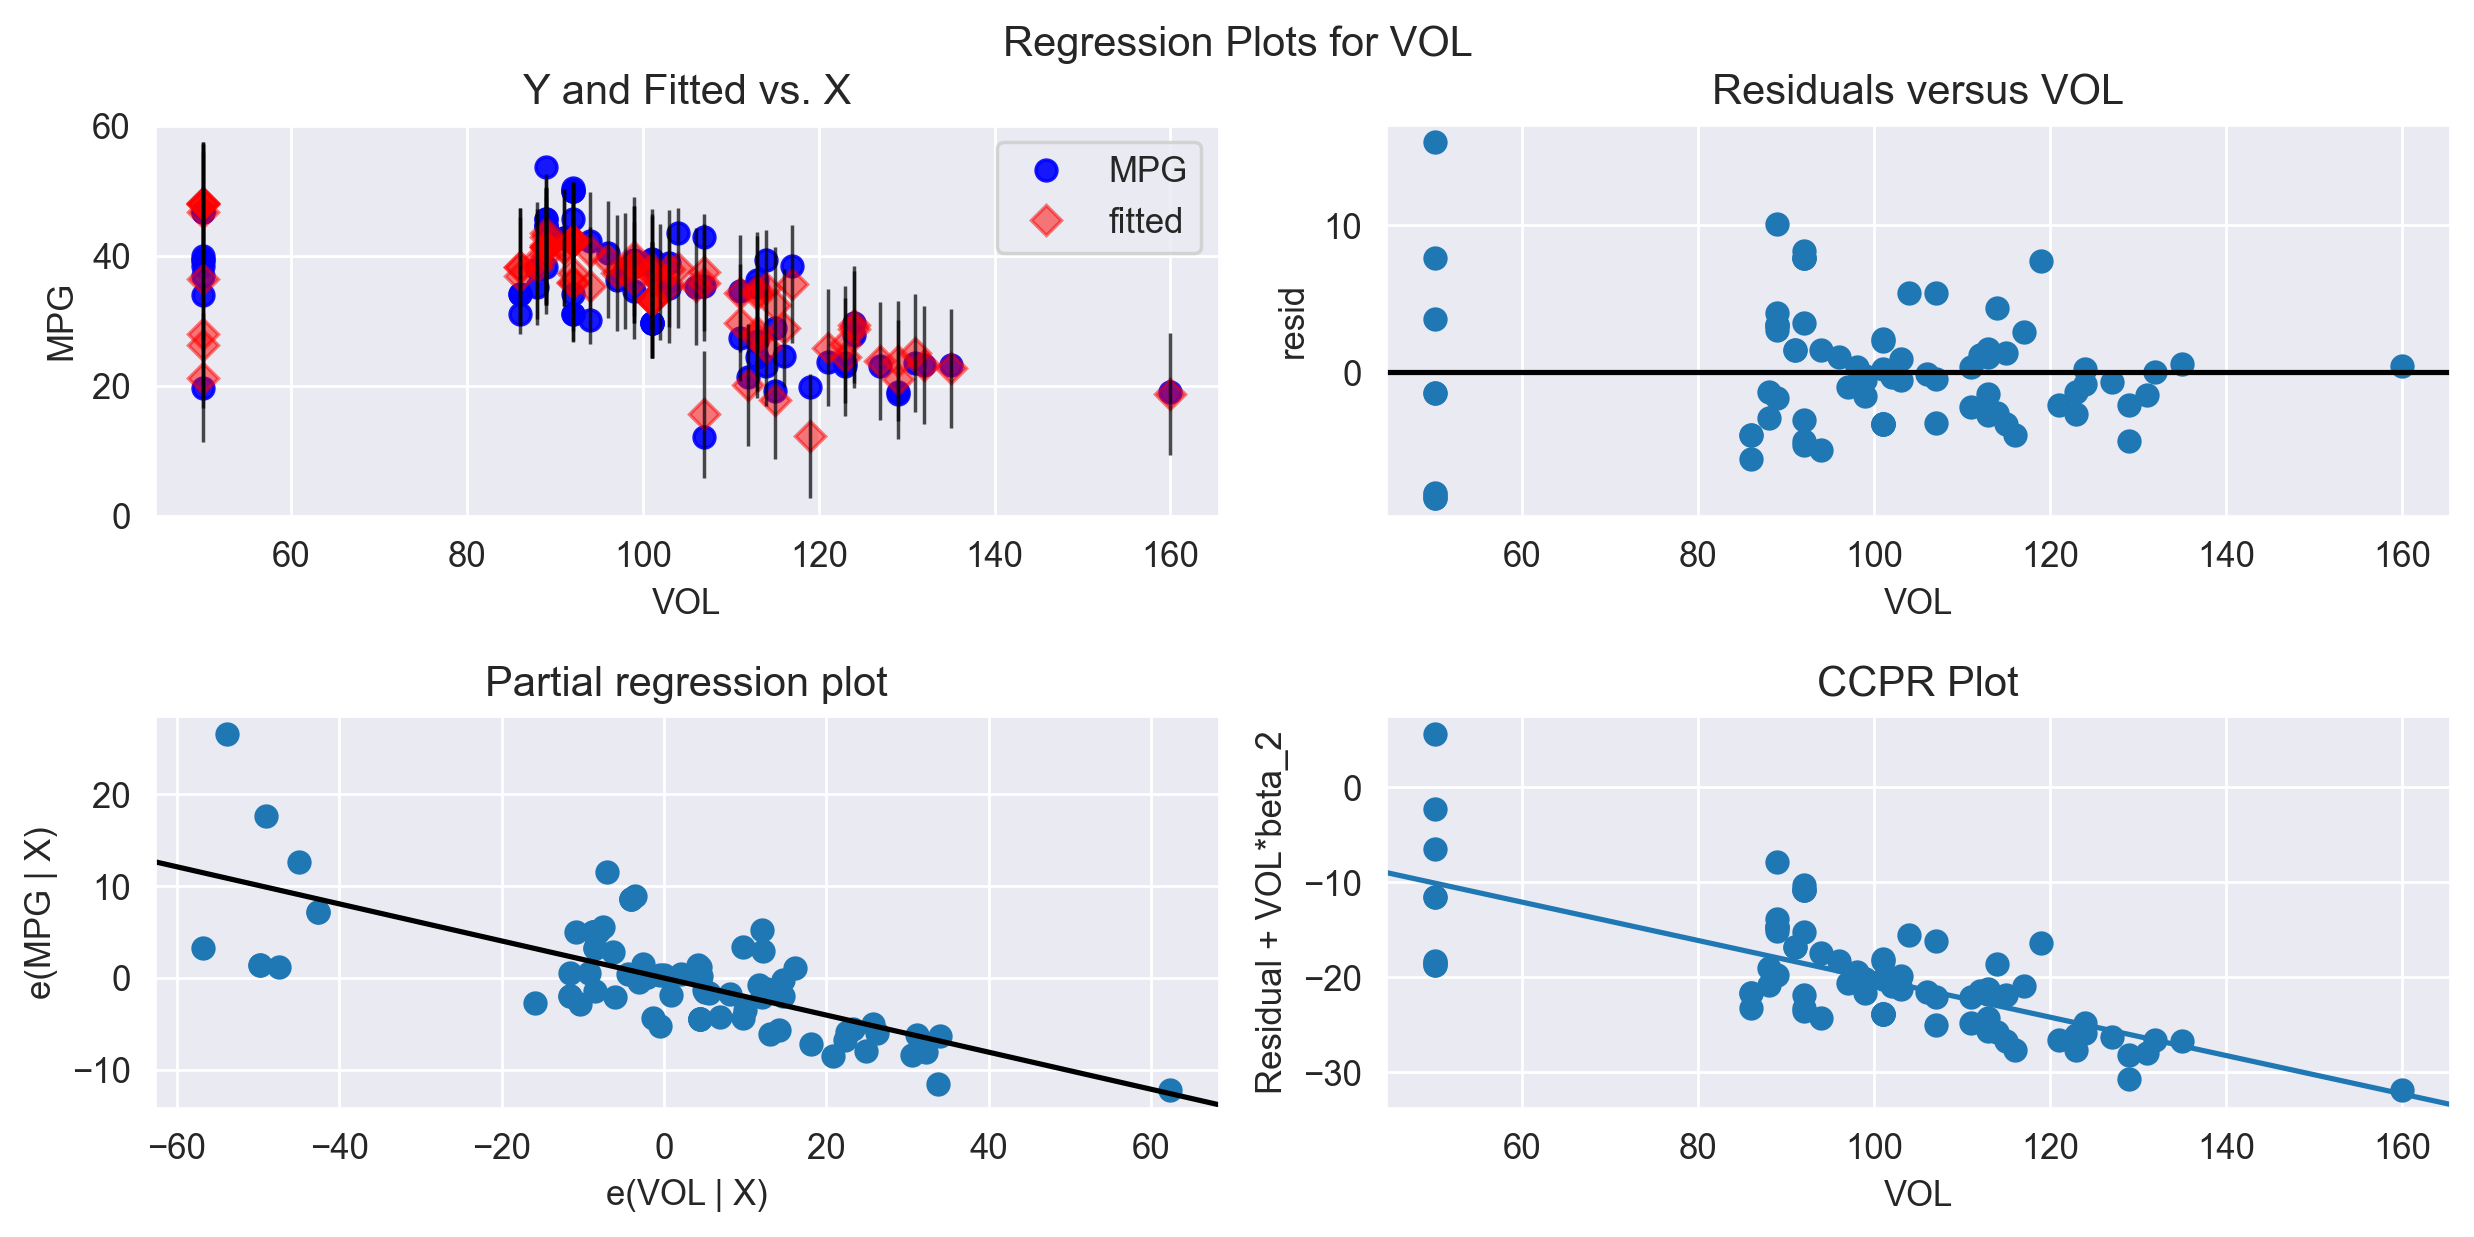

In [51]:
#Vol
sm.graphics.plot_regress_exog(model,'VOL');

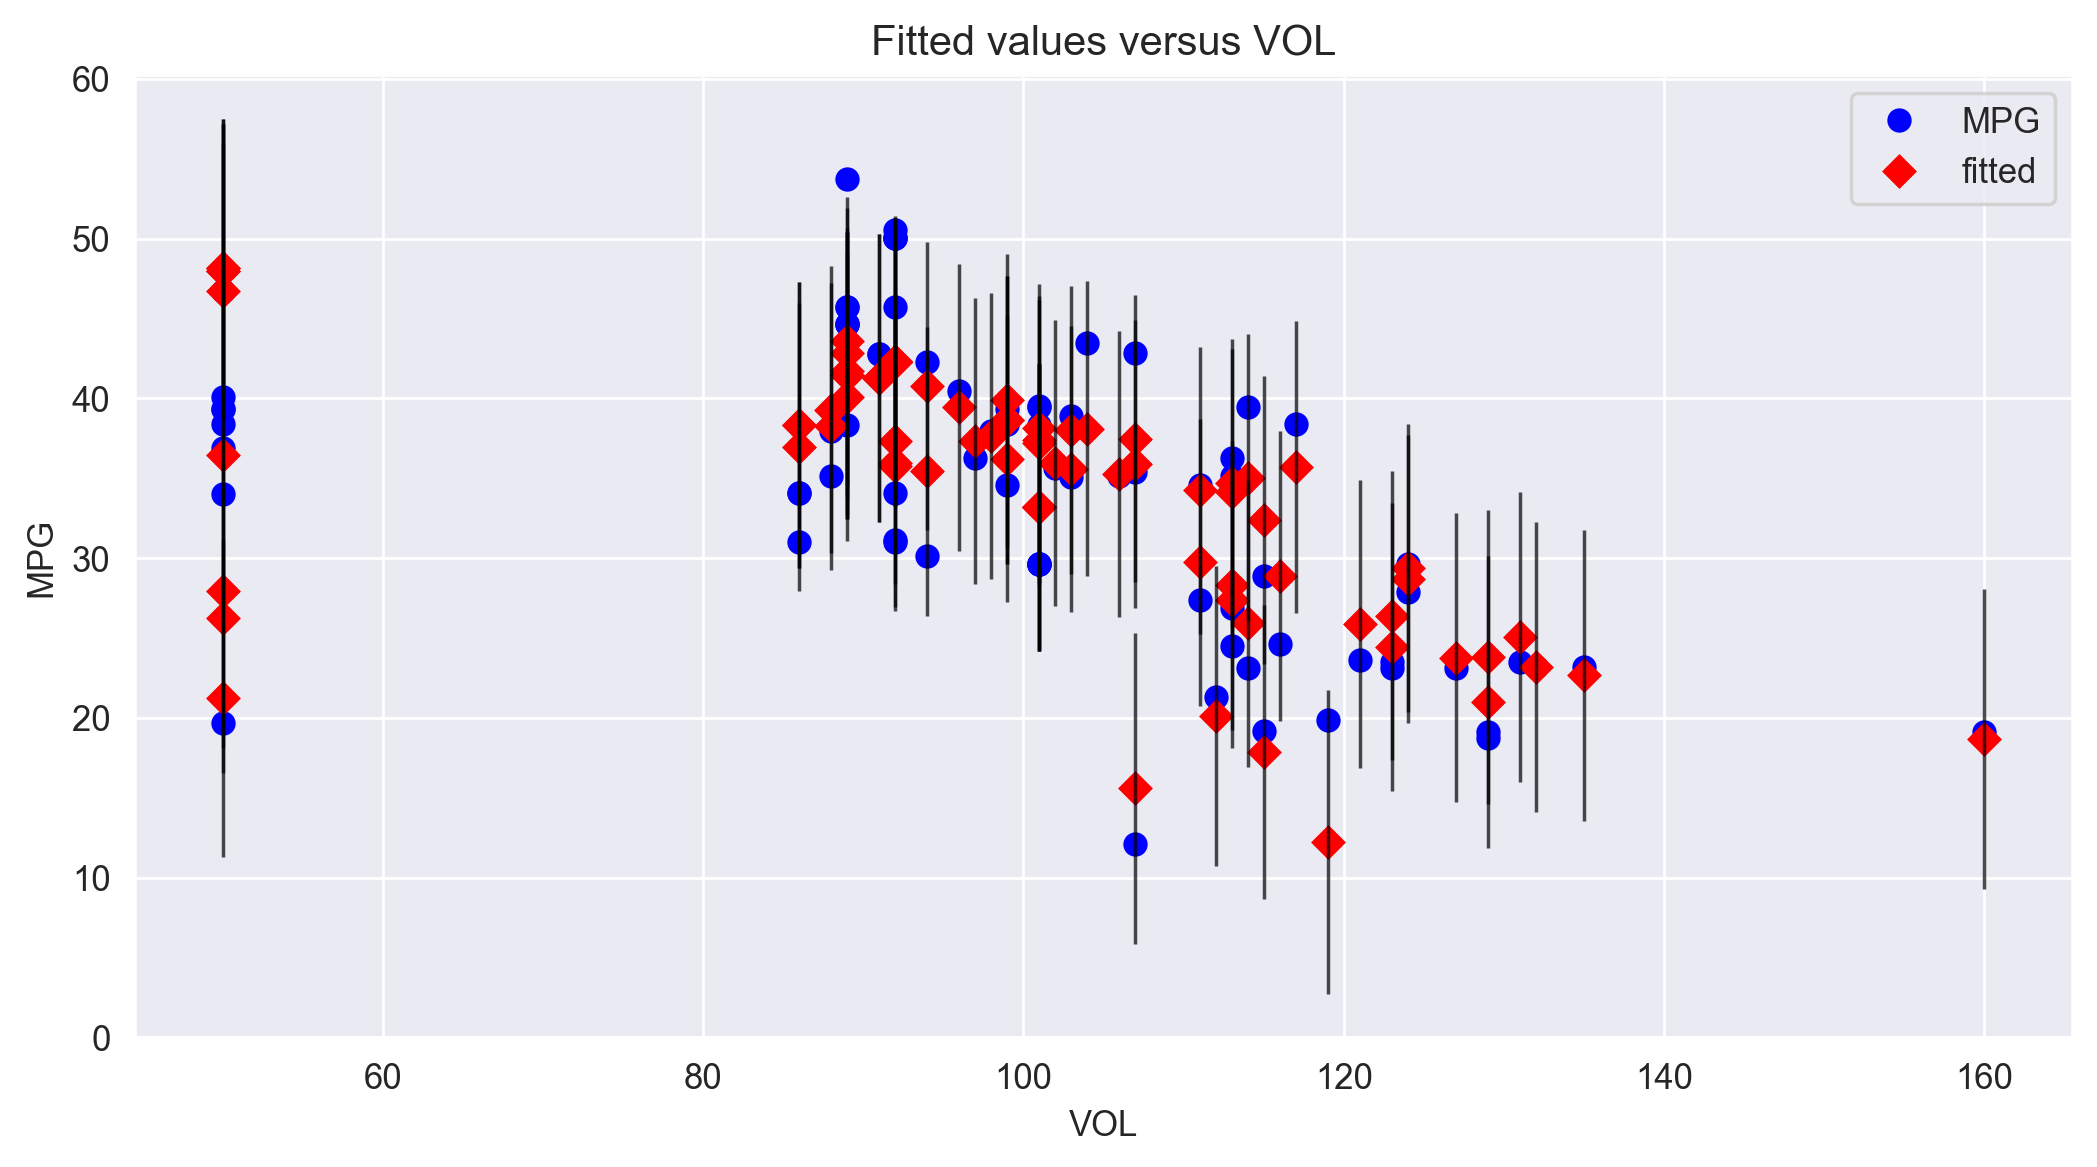

In [53]:
sm.graphics.plot_fit(model,'VOL');

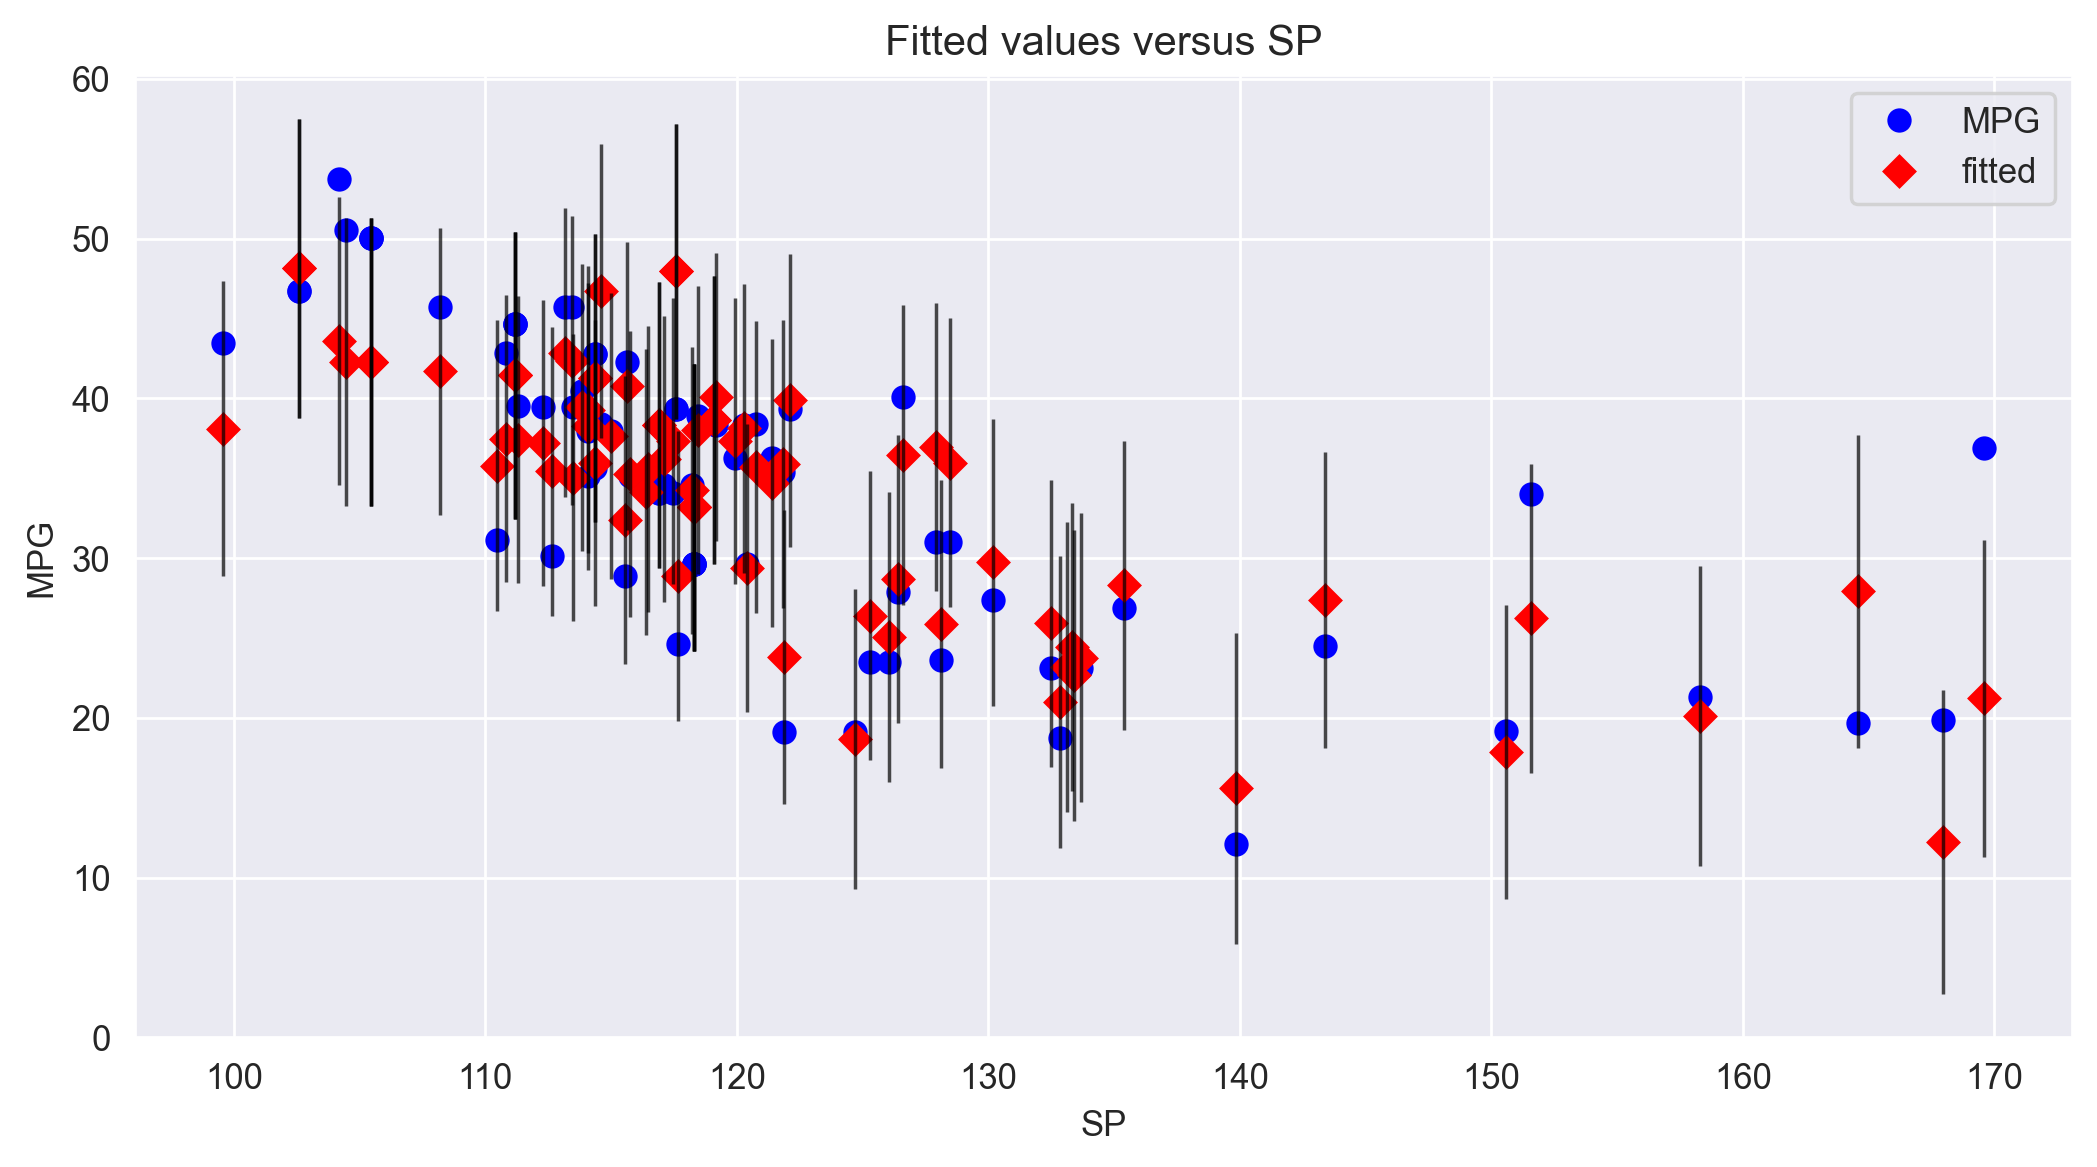

In [54]:
#Sp
sm.graphics.plot_fit(model,'SP');

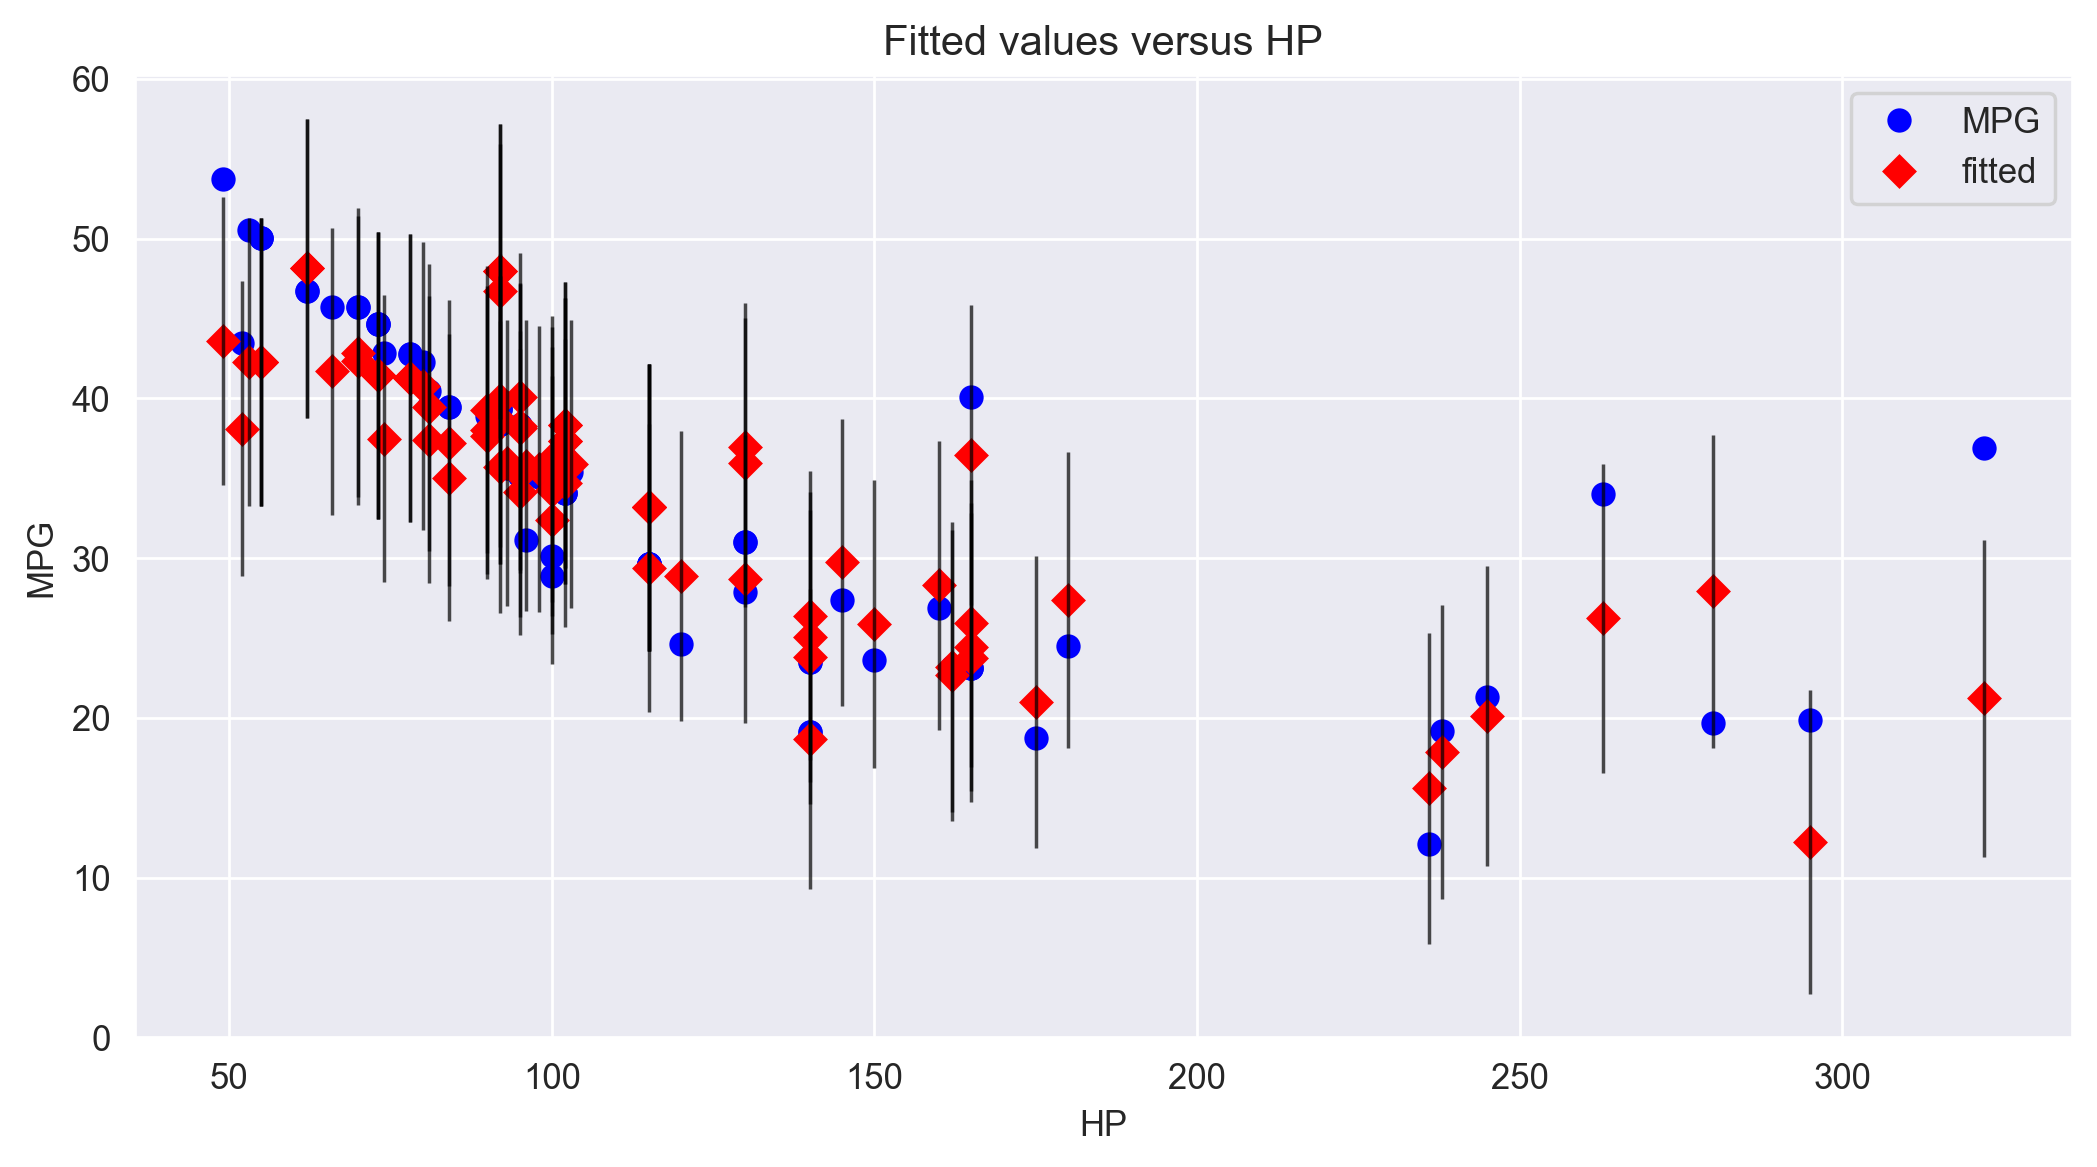

In [55]:
#Hp
sm.graphics.plot_fit(model,'HP');

# MODEL DELETION TECHNIQUES

# Cook's Distance
   - **Detecting influencers and outliers**

In [56]:
model

In [59]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c , p = inf.cooks_distance

In [60]:
c

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

<StemContainer object of 3 artists>

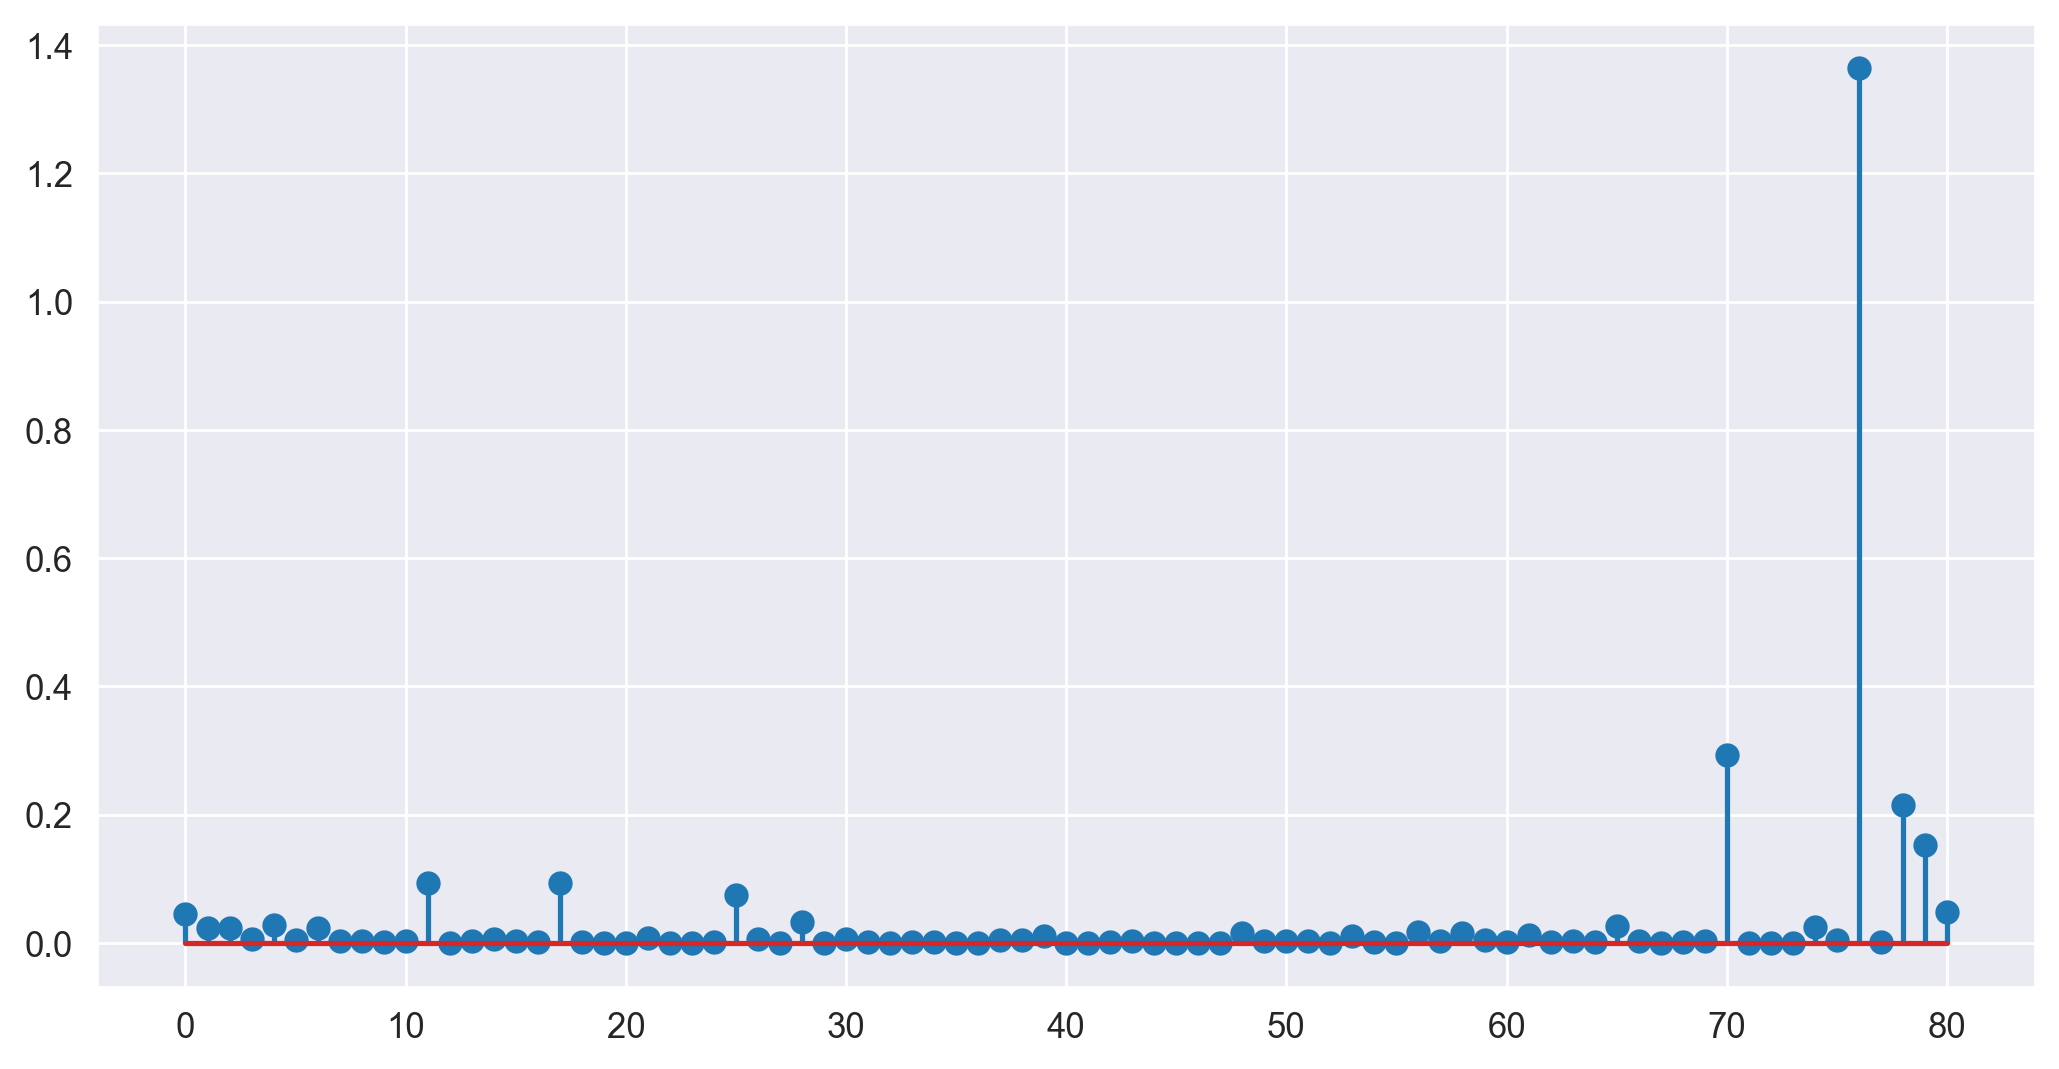

In [61]:
# Cook's distance plot
plt.stem(c)

In [63]:
np.argmax(c), np.max(c)

(76, 1.36417438691032)

In [65]:
df.iloc[[76]]

,HP,MPG,VOL,SP,WT
76,322,36.9,50,169.598513,16.132947


In [66]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [67]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

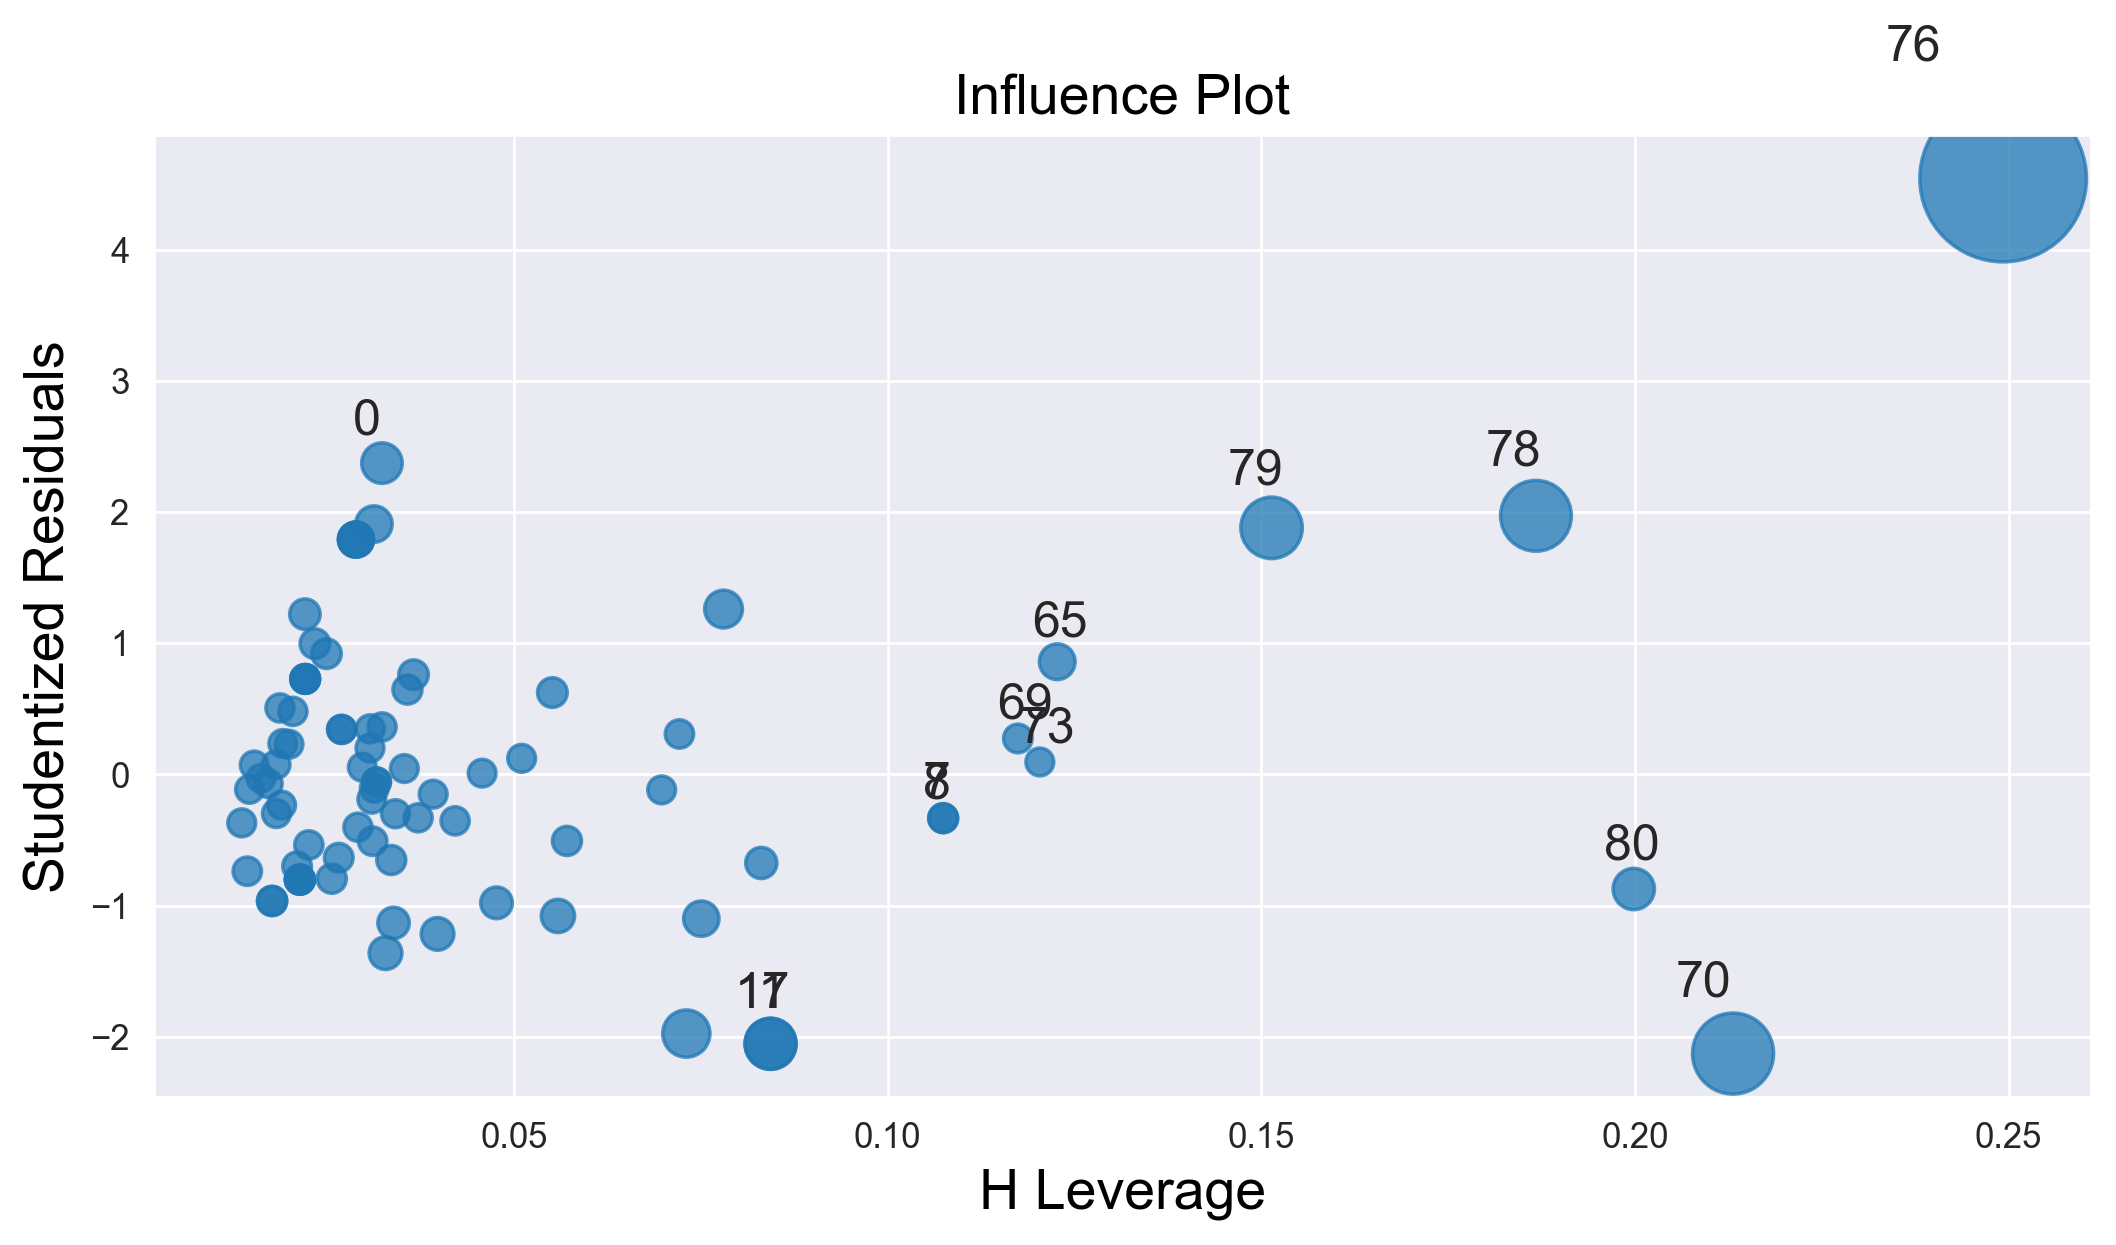

In [69]:
influence_plot(model);

In [73]:
#Calculate cutoff
k = len(df.columns)
n = len(df)

lv = 3*(k+1)/n
lv

0.2222222222222222

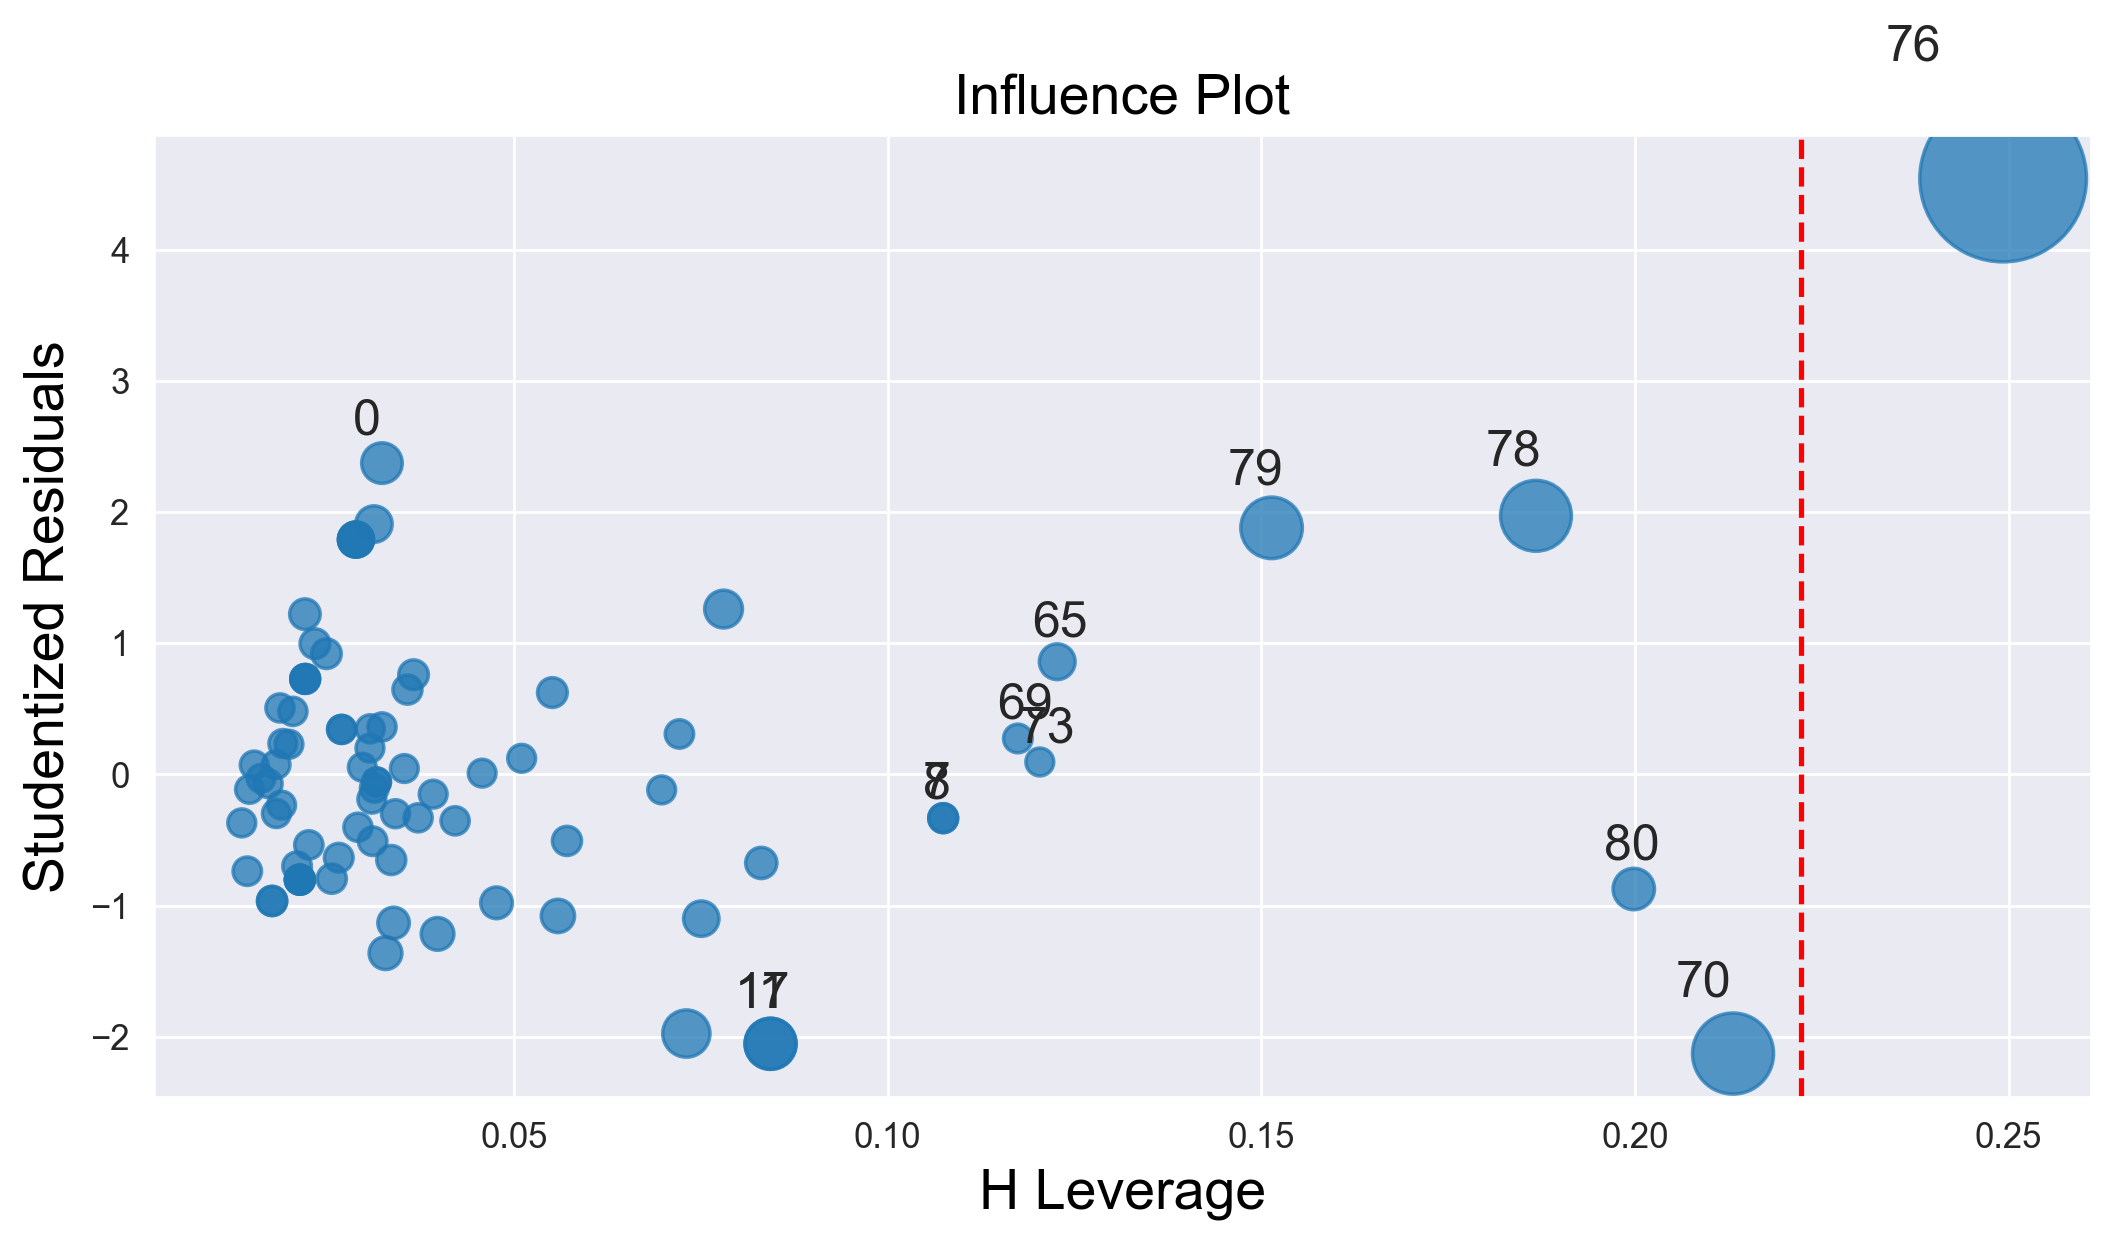

In [76]:
influence_plot(model)
plt.axvline(lv, linestyle = '--', color = 'red')

# Improving the model

In [77]:
df.drop(index=76,inplace=True)

In [78]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [35]:
#reset the index

In [79]:
df.reset_index(inplace=True)

In [80]:
df

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
75,75,175,18.762837,129,132.864163,42.778219
76,77,238,19.197888,115,150.576579,37.923113
77,78,263,34.000000,50,151.598513,15.769625
78,79,295,19.833733,119,167.944460,39.423099


In [81]:
df.drop(columns=['index'], inplace=True)

In [82]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
76,238,19.197888,115,150.576579,37.923113
77,263,34.000000,50,151.598513,15.769625
78,295,19.833733,119,167.944460,39.423099


In [83]:
final_model = smf.ols('MPG~HP+SP+VOL', data = df).fit()

In [84]:
final_model.rsquared

0.8192122305013384

In [36]:
# Cook's distance plot


In [37]:
#Final Model


**Since the value is <1 , we can stop the diagnostic process and finalize the model**

# Predicting for new records

In [86]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [87]:
test = pd.DataFrame({
    'HP' : [56,53.62,95],
    'VOL' : [92.6,85.63,75],
    'SP' : [110,112,150]
})

In [89]:
test

,HP,VOL,SP
0,56.00,92.60,110
1,53.62,85.63,112
2,95.00,75.00,150


In [88]:
final_model.predict(test)

0    44.410251
1    46.979473
2    55.103295
dtype: float64